In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc , html
from dash.dependencies import Input , Output
import plotly.express as px

In [3]:
df=pd.read_csv("worldometer_data.csv")
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [5]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [6]:
Region = df.groupby(by='WHO Region').sum(numeric_only=True).reset_index()
Region

,WHO Region,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,Africa,1.118461e+09,852026,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0
1,Americas,1.018880e+09,10452852,7902.0,384637.0,899.0,6259733.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
2,EasternMediterranean,7.320077e+08,1605866,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
3,Europe,9.277339e+08,3544086,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
4,South-EastAsia,1.997513e+09,2426899,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
5,WesternPacific,5.221449e+08,267114,20.0,3975.0,1.0,182319.0,42.0,80820.0,467.0,13092.0,64.70,13217093.0,744427.0


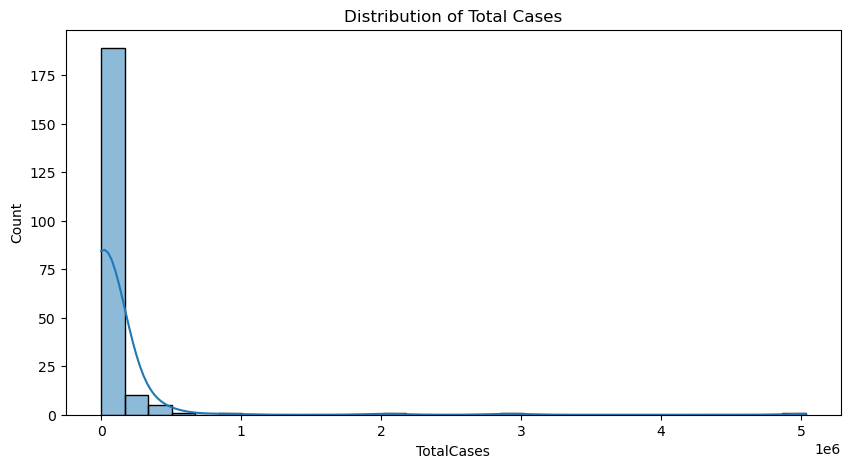

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalCases'], bins=30, kde=True)
plt.title('Distribution of Total Cases')
plt.show()


Text(0.5, 1.0, 'TotalCases')

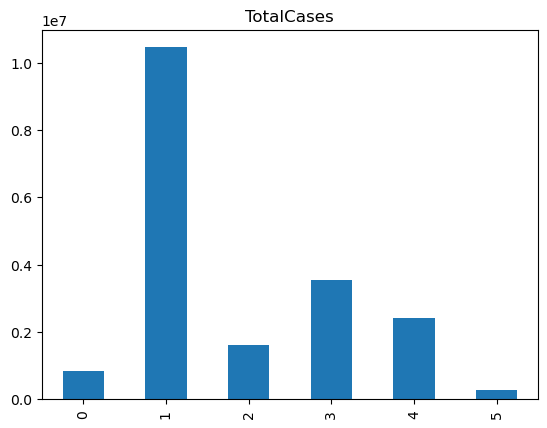

In [8]:
Region['TotalCases'].plot(kind='bar', ) 
plt.title('TotalCases')

Text(0.5, 1.0, 'TotalRecovered')

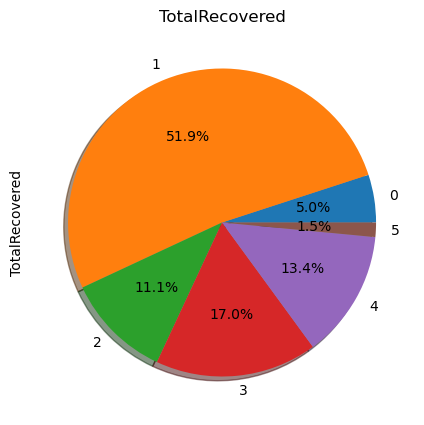

In [9]:
Region['TotalRecovered'].plot(kind='pie',  figsize=(10,5), shadow=True, autopct='%1.1f%%') 
plt.title('TotalRecovered')

In [10]:
df['Country/Region'].unique()
df['Country/Region'] = pd.to_numeric(df['Country/Region'], errors='coerce')
df.dropna(subset=['Country/Region'], inplace=True)

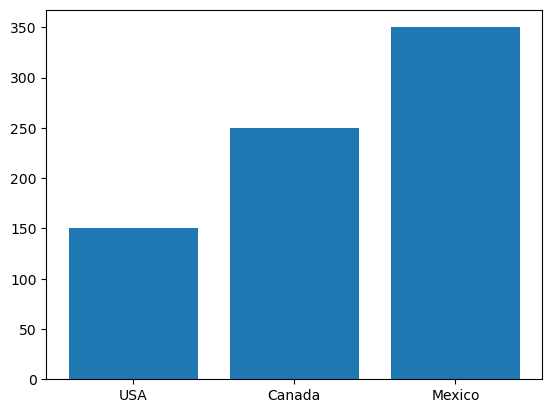

In [11]:
data = {
    'Country': ['USA', 'Canada', 'Mexico'],
    'TotalCases': ['150', '250', '350']}
df = pd.DataFrame(data)
df['TotalCases'] = pd.to_numeric(df['TotalCases'], errors='coerce')
plt.bar(df['Country'], df['TotalCases'])
plt.show()

In [12]:
Region['TotalRecovered'] = Region['TotalRecovered'] + Region['NewRecovered']

In [13]:
Region['TotalDeaths'] = Region['TotalDeaths'] + Region['NewDeaths']

In [14]:
Region['TotalCases'] = Region['TotalCases'] + Region['NewCases']
Region

,WHO Region,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,Africa,1.118461e+09,852026.0,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0
1,Americas,1.018880e+09,10460754.0,7902.0,385536.0,899.0,6264809.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
2,EasternMediterranean,7.320077e+08,1605866.0,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
3,Europe,9.277339e+08,3544086.0,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
4,South-EastAsia,1.997513e+09,2426899.0,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
5,WesternPacific,5.221449e+08,267134.0,20.0,3976.0,1.0,182361.0,42.0,80820.0,467.0,13092.0,64.70,13217093.0,744427.0


In [15]:
Region['TotalCases'] = Region['TotalCases'] + Region['NewCases']
Region

,WHO Region,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,Africa,1.118461e+09,852026.0,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0
1,Americas,1.018880e+09,10468656.0,7902.0,385536.0,899.0,6264809.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
2,EasternMediterranean,7.320077e+08,1605866.0,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
3,Europe,9.277339e+08,3544086.0,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
4,South-EastAsia,1.997513e+09,2426899.0,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
5,WesternPacific,5.221449e+08,267154.0,20.0,3976.0,1.0,182361.0,42.0,80820.0,467.0,13092.0,64.70,13217093.0,744427.0


In [16]:
from ipywidgets import interact
def bubble_chart(n):
    if n>=1:
        fig = px.scatter(Region.head(n), x="WHO Region", y="TotalRecovered", size="TotalRecovered", color="WHO Region",
                   hover_name="WHO Region", size_max=60)
        fig.update_layout(
        title=str(n) +" Worst hit continents",
        xaxis_title="continents",
        yaxis_title="Recovered Cases",
        width = 850
        )
        fig.show();
    else:
        print("invalid Input")

interact(bubble_chart, n=6)

interactive(children=(IntSlider(value=6, description='n', max=18, min=-6), Output()), _dom_classes=('widget-in…

<function __main__.bubble_chart(n)>

In [17]:
from ipywidgets import interact
def bubble_chart(n):
    if n>=1:
        fig = px.scatter(Region.head(n), x="WHO Region", y="TotalDeaths", size="TotalDeaths", color="WHO Region",
                   hover_name="WHO Region", size_max=60)
        fig.update_layout(
        title=str(n) +" Worst hit continents",
        xaxis_title="continents",
        yaxis_title="Deaths Cases",
        width = 850
        )
        fig.show();
    else:
        print("invalid Input")

interact(bubble_chart, n=6)

interactive(children=(IntSlider(value=6, description='n', max=18, min=-6), Output()), _dom_classes=('widget-in…

<function __main__.bubble_chart(n)>

In [18]:
px.bar(
    Region.head(6),
    x = "WHO Region",
    y = "Serious,Critical",
    title=str(6) +" Worst hit continents", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [19]:
px.bar(
    Region.head(6),
    x = "WHO Region",
    y = "ActiveCases",
    title=str(6) +" Worst hit continents",
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)